In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# https://www.sheffield.ac.uk/mash/data
df = pd.read_csv("data/child_data.csv")
df.head()

,age,mem_span,iq,read_ab
0,6.7,4.4,95,7.2
1,5.9,4.0,90,6.0
2,5.5,4.1,105,6.0
3,6.2,4.8,98,6.6
4,6.4,5.0,106,7.0


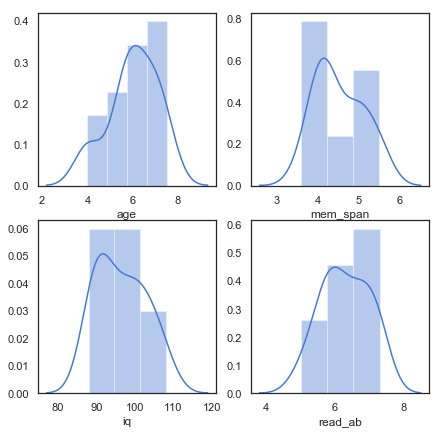

In [3]:
sns.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(2, 2, figsize=(7, 7))

sns.distplot(df.age, ax=axes[0, 0])
sns.distplot(df.mem_span, ax=axes[0, 1])
sns.distplot(df.iq, ax=axes[1, 0])
sns.distplot(df.read_ab, ax=axes[1, 1])

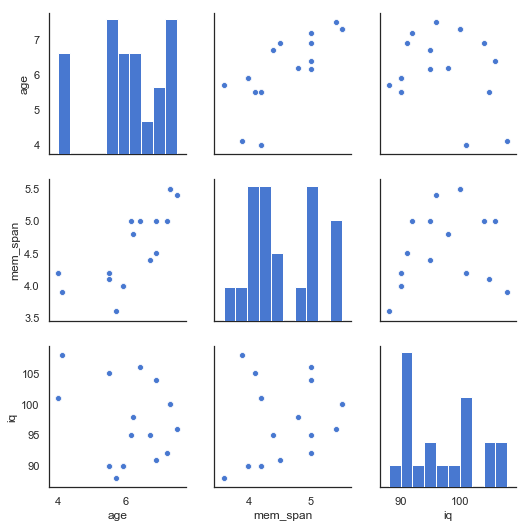

In [4]:
sns.pairplot(df, vars=['age', 'mem_span', 'iq'])

In [5]:
# Rescale all variables
for col in df.columns.values:
    df[col] = (df[col] - np.mean(df[col]))/(2 * np.std(df[col]))
    
df.head()

,age,mem_span,iq,read_ab
0,0.321573,-0.111029,-0.121907,0.671567
1,-0.060967,-0.466321,-0.528263,-0.223856
2,-0.252237,-0.377498,0.690806,-0.223856
3,0.082485,0.244264,0.121907,0.223856
4,0.178120,0.421910,0.772077,0.522330


In [6]:
# Ordinary multiple linear regression
# Mem_span and age seems correlated, so I'll use one of them
mod1 = sm.formula.ols('read_ab ~ age + iq', data=df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                read_ab   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     39.02
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           4.43e-07
Time:                        15:49:41   Log-Likelihood:                 2.6945
No. Observations:                  20   AIC:                            0.6110
Df Residuals:                      17   BIC:                             3.598
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.494e-16      0.051   1.46e-14      1.000      -0.108       0.108
age            0.9117      0.105      8.711      0.000       0.691       1.133
iq             0.3313      0.105      3.165      0.006       0.110       0.552
==============================================================================
Omnibus:                        2.054   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.358   Jarque-Bera (JB):                1.064
Skew:                          -0.562   Prob(JB):                        0.587
Kurtosis:                       3.116   Cond. No.                         2.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
mod2 = sm.formula.ols('read_ab ~ age + mem_span', data=df).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                read_ab   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     35.57
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           8.41e-07
Time:                        15:49:41   Log-Likelihood:                 1.9408
No. Observations:                  20   AIC:                             2.118
Df Residuals:                      17   BIC:                             5.106
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.494e-16      0.053   1.41e-14      1.000      -0.112       0.112
age            0.5296      0.154      3.435      0.003       0.204       0.855
mem_span       0.4377      0.154      2.839      0.011       0.112       0.763
==============================================================================
Omnibus:                        2.416   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                0.846
Skew:                           0.276   Prob(JB):                        0.655
Kurtosis:                       3.843   Cond. No.                         3.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Now, add interaction term
mod1 = sm.formula.ols('read_ab ~ age + iq + age:iq', data=df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                read_ab   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     28.85
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.09e-06
Time:                        15:49:41   Log-Likelihood:                 4.0604
No. Observations:                  20   AIC:                           -0.1207
Df Residuals:                      16   BIC:                             3.862
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0202      0.051      0.396      0.698      -0.088       0.129
age            0.7956      0.126      6.308      0.000       0.528       1.063
iq             0.3837      0.106      3.605      0.002       0.158       0.609
age:iq         0.4077      0.266      1.530      0.145      -0.157       0.972
==============================================================================
Omnibus:                        1.020   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.133
Skew:                          -0.102   Prob(JB):                        0.935
Kurtosis:                       3.344   Cond. No.                         5.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""